In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-worldhealth-statistics-2020-complete/maternalMortalityRatio.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/neonatalMortalityRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/adolescentBirthRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/mortalityRateUnsafeWash.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/cleanFuelAndTech.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/population10SDG3.8.2.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/dataAvailibilityForUhc.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/WHOregionLifeExpectancyAtBirth.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/atLeastBasicSanitizationServices.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/incedenceOfMalaria.csv
/kaggle/input/who-worl

In [2]:
pip install pycountry-convert

     |████████████████████████████████| 242 kB 936 kB/s 
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,5]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import pycountry
import pycountry_convert as pc

def convert_continent(x):
    try:
        return pc.country_alpha2_to_continent_code(x)
    except:
        if x == 'TL':
            return 'AS'

# Data explore

## Maternal mortality ratio

In [4]:
maternalMortalityRatio = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/maternalMortalityRatio.csv', parse_dates =['Period'])
maternalMortalityRatio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       3294 non-null   object        
 1   Period         3294 non-null   datetime64[ns]
 2   Indicator      3294 non-null   object        
 3   First Tooltip  3294 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 103.1+ KB


In [5]:
maternalMortalityRatio.sample(5)

,Location,Period,Indicator,First Tooltip
1876,Mauritania,2013-01-01,Maternal mortality ratio (per 100 000 live births),805 [588-1100]
3132,United States of America,2017-01-01,Maternal mortality ratio (per 100 000 live births),19 [17-21]
1201,Grenada,2004-01-01,Maternal mortality ratio (per 100 000 live births),38 [25-54]
1606,Kyrgyzstan,2013-01-01,Maternal mortality ratio (per 100 000 live births),70 [60-83]
1432,Ireland,2007-01-01,Maternal mortality ratio (per 100 000 live births),6 [5-8]


In [6]:
# Period of data
maternalMortalityRatio['Period'].value_counts().sort_index()

2000-01-01    183
2001-01-01    183
2002-01-01    183
2003-01-01    183
2004-01-01    183
2005-01-01    183
2006-01-01    183
2007-01-01    183
2008-01-01    183
2009-01-01    183
2010-01-01    183
2011-01-01    183
2012-01-01    183
2013-01-01    183
2014-01-01    183
2015-01-01    183
2016-01-01    183
2017-01-01    183
Name: Period, dtype: int64

In [7]:
# Take the same period as maternal death

In [8]:
# No. of countries
len(maternalMortalityRatio['Location'].unique())

184

Interesting, there is one extra country compared to the count in years

In [9]:
maternalMortalityRatio['Location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

Could write a regex to find similar pattern in country name, but my eyes caught Sudan

In [10]:
# Change "Sudan (until 2011)" to "Sudan"
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
len(maternalMortalityRatio['Location'].unique())

183

* The first tooltip is the value, but it includes a range (unknown measurement). Need to get the value before '\['
* Also rename the column to ratio

In [11]:
maternalMortalityRatio = maternalMortalityRatio.rename(columns={'First Tooltip': 'ratio'})

In [12]:
f = lambda x: x["ratio"].split("[")[0]
maternalMortalityRatio['ratio'] = maternalMortalityRatio.apply(f, axis=1)

maternalMortalityRatio['ratio'] = maternalMortalityRatio['ratio'].astype(int)

### By country

{'Sierra Leone': 'red', 'South Sudan': 'orange', 'Afghanistan': 'green', 'Chad': 'blue', 'Central African Republic': 'purple'}


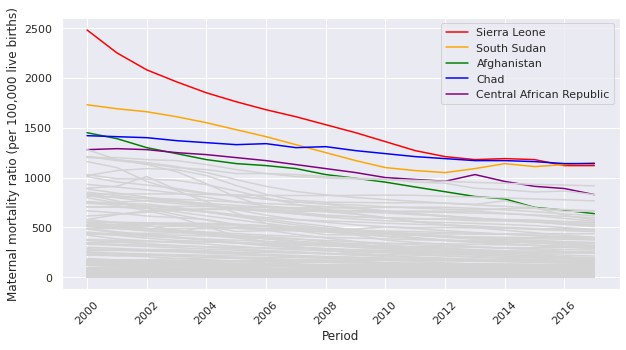

In [13]:
# Set top 5 as colored, the rest as grey
ratio_sorted = maternalMortalityRatio.sort_values(['ratio'], ascending = False)
colorlist = ['red','orange','green','blue','purple']
palette = {c:colorlist[i] for i, c in enumerate(ratio_sorted['Location'].unique()[:5])}
print(palette)
other_palette = {c:'lightgrey' for c in ratio_sorted['Location'].unique()[5:]}
palette = {**palette, **other_palette}

sns.set(style="darkgrid")

ax = sns.lineplot(x='Period', y='ratio', hue='Location', palette = palette, data = ratio_sorted)
ax.legend(['Sierra Leone','South Sudan','Afghanistan','Chad','Central African Republic'])
plt.xticks(rotation=45)
plt.ylabel('Maternal mortality ratio (per 100,000 live births)')
plt.show()

### By continent

In [14]:
# Need to change some country name to use pycountry
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
maternalMortalityRatio.loc[maternalMortalityRatio['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'

In [15]:
maternalMortalityRatio['country_code'] = maternalMortalityRatio['Location'].apply(pc.country_name_to_country_alpha2)
maternalMortalityRatio['continent'] = maternalMortalityRatio['country_code'].apply(lambda x: convert_continent(x))

Text(0, 0.5, 'Maternal mortality per 100,000 live births')

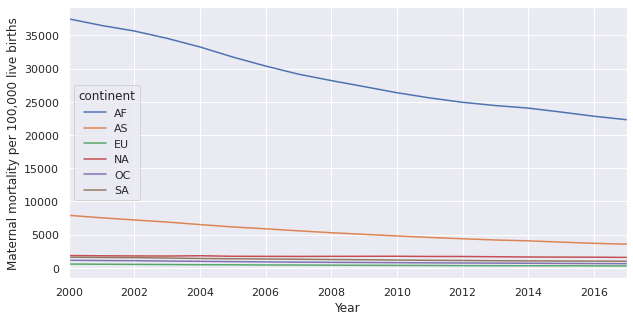

In [16]:
continent_fplot = maternalMortalityRatio.groupby(['Period','continent']).sum()
plot_df = continent_fplot.unstack('continent').loc[:,'ratio']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
ax = plot_df.plot()
ax.set_xlabel('Year')
ax.set_ylabel("Maternal mortality per 100,000 live births")

Remarks:
* Countries in Afria have been the highest in maternal mortality since 2000

# Infant mortality rate
Infant mortality rate is the probability of a child born in a specific year or period dying before reaching the age of one, if subject to age-specific mortality rates of that period. Infant mortality rate is strictly speaking not a rate (i.e. the number of deaths divided by the number of population at risk during a certain period of time) but a probability of death derived from a life table and expressed as rate per 1000 live births. 

https://www.who.int/data/gho/data/indicators/indicator-details/GHO/infant-mortality-rate-(probability-of-dying-between-birth-and-age-1-per-1000-live-births)

In [17]:
infantMortalityRate = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/infantMortalityRate.csv', parse_dates=['Period'])
infantMortalityRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       29999 non-null  object        
 1   Period         29999 non-null  datetime64[ns]
 2   Indicator      29999 non-null  object        
 3   Dim1           29999 non-null  object        
 4   First Tooltip  29999 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


In [18]:
print(infantMortalityRate['Period'].value_counts().sort_index())

1950-01-01    147
1951-01-01    171
1952-01-01    192
1953-01-01    204
1954-01-01    210
             ... 
2015-01-01    516
2016-01-01    516
2017-01-01    516
2018-01-01    516
2019-01-01    516
Name: Period, Length: 70, dtype: int64


In [19]:
# Need to change some country name to use pycountry
infantMortalityRate.loc[infantMortalityRate['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
infantMortalityRate.loc[infantMortalityRate['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
infantMortalityRate.loc[infantMortalityRate['Location'] == "India (until 1975)", 'Location'] = 'India'
infantMortalityRate.loc[infantMortalityRate['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
infantMortalityRate.loc[infantMortalityRate['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'

In [20]:
infantMortalityRate['country_code'] = infantMortalityRate['Location'].apply(pc.country_name_to_country_alpha2)
infantMortalityRate['continent'] = infantMortalityRate['country_code'].apply(lambda x: convert_continent(x))

In [21]:
infantMortalityRate = infantMortalityRate.rename(columns={'Dim1':'Sex', 'First Tooltip':'mortality_rate'})
infantMortalityRate.head()

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
0,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,46.51 [37.71-55.82],AF,AS
1,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Male,49.8 [40.2-59.95],AF,AS
2,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,43.05 [34.82-51.96],AF,AS
3,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,48.04 [39.94-56.32],AF,AS
4,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Male,51.35 [42.56-60.4],AF,AS


In [22]:
f = lambda x: x['mortality_rate'].split("[")[0]
infantMortalityRate['mortality_rate'] = infantMortalityRate.apply(f, axis=1)

infantMortalityRate['mortality_rate'] = infantMortalityRate['mortality_rate'].astype(float)

In [23]:
infantMortalityRate.sample(10)

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
7949,Democratic Republic of the Congo,2000-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,98.06,CD,AF
27387,Singapore,1982-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,10.70,SG,AS
26668,Senegal,1985-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Male,89.24,SN,AF
4735,Burundi,2001-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Male,100.00,BI,AF
28730,Sudan,1995-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,67.05,SD,AF
9944,Ethiopia,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,31.39,ET,AF
3079,Benin,1996-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Male,99.70,BJ,AF
15284,Japan,1953-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,43.54,JP,AS
21240,Netherlands,1959-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,16.95,NL,EU
23012,Papua New Guinea,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Female,32.57,PG,OC


In [24]:
infantMortalityRate_bothsex = infantMortalityRate[infantMortalityRate['Sex']=='Both sexes']
infantMortalityRate_male = infantMortalityRate[infantMortalityRate['Sex']=='Male']
infantMortalityRate_female = infantMortalityRate[infantMortalityRate['Sex']=='Female']

Text(0, 0.5, 'probability of dying between birth and age 1 per 1000 live births')

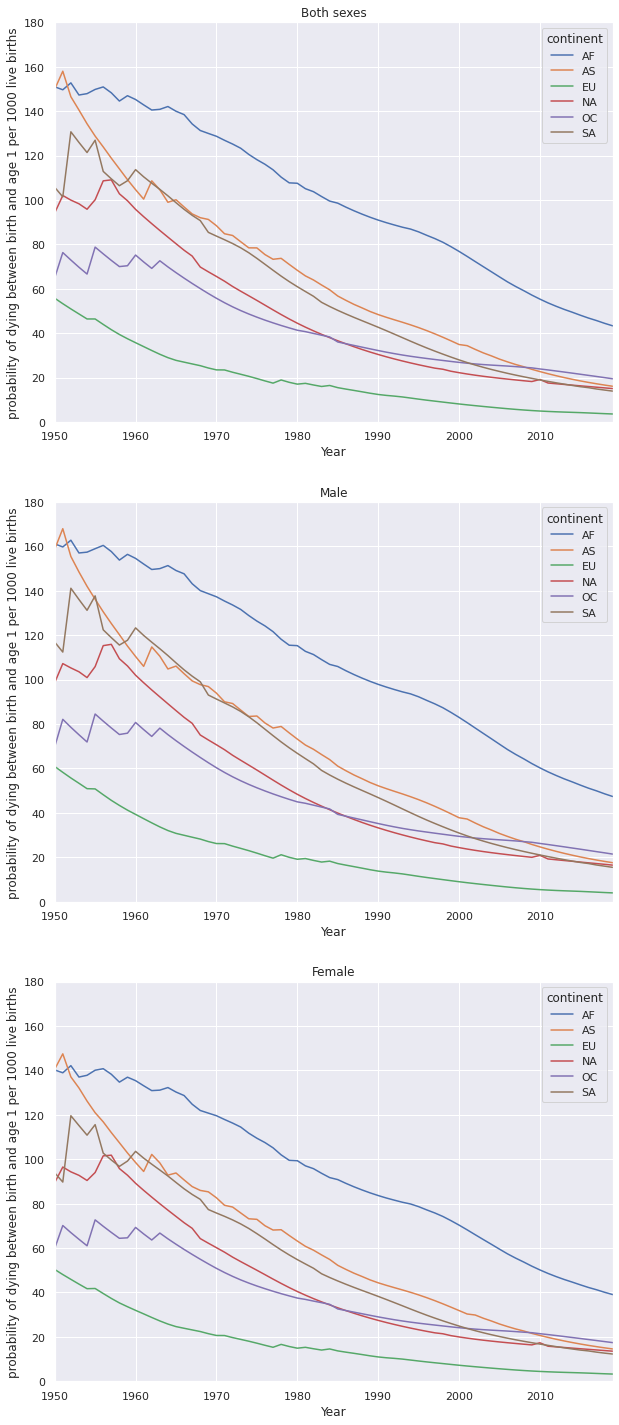

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=1)

continent_fplot = infantMortalityRate_bothsex.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[0], figsize = [10,25],ylim=(0,180), title='Both sexes')
axes[0].set_xlabel('Year')
axes[0].set_ylabel("probability of dying between birth and age 1 per 1000 live births")

continent_fplot = infantMortalityRate_male.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[1], figsize = [10,25],ylim=(0,180), title='Male')
axes[1].set_xlabel('Year')
axes[1].set_ylabel("probability of dying between birth and age 1 per 1000 live births")

continent_fplot = infantMortalityRate_female.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[2], figsize = [10,25],ylim=(0,180), title='Female')
axes[2].set_xlabel('Year')
axes[2].set_ylabel("probability of dying between birth and age 1 per 1000 live births")

Comments:
<br/>
Decreasing infant mortality rate over the years for both sexes (both and individual), with countries in Africa at the highest

# Neonatal mortality rate

In [26]:
neonatalMortalityRate = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/neonatalMortalityRate.csv', parse_dates=['Period']) 
neonatalMortalityRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       9135 non-null   object        
 1   Period         9135 non-null   datetime64[ns]
 2   Indicator      9135 non-null   object        
 3   Dim1           9135 non-null   object        
 4   First Tooltip  9135 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 357.0+ KB


In [27]:
# Need to change some country name to use pycountry
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "India (until 1975)", 'Location'] = 'India'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
neonatalMortalityRate.loc[neonatalMortalityRate['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

In [28]:
neonatalMortalityRate['country_code'] = neonatalMortalityRate['Location'].apply(pc.country_name_to_country_alpha2)
neonatalMortalityRate['continent'] = neonatalMortalityRate['country_code'].apply(lambda x: convert_continent(x))

In [29]:
neonatalMortalityRate = neonatalMortalityRate.rename(columns={'Dim1':'Sex', 'First Tooltip':'mortality_rate'})
neonatalMortalityRate.head()

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
0,Afghanistan,2019-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,35.86 [27.77-45.18],AF,AS
1,Afghanistan,2018-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,36.89 [29.34-45.28],AF,AS
2,Afghanistan,2017-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.98 [30.95-45.6],AF,AS
3,Afghanistan,2016-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,39.05 [32.59-46.17],AF,AS
4,Afghanistan,2015-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,40.27 [34.34-46.94],AF,AS


In [30]:
f = lambda x: x['mortality_rate'].split("[")[0]
neonatalMortalityRate['mortality_rate'] = neonatalMortalityRate.apply(f, axis=1)

neonatalMortalityRate['mortality_rate'] = neonatalMortalityRate['mortality_rate'].astype(float)

In [31]:
neonatalMortalityRate['Sex'].value_counts()

Both sexes    9135
Name: Sex, dtype: int64

In [32]:
neonatalMortalityRate.sample(10)

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
1443,Cameroon,1998-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.17,CM,AF
6093,Oman,2003-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,6.38,OM,AS
3331,Guinea-Bissau,1998-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,57.03,GW,AF
244,Argentina,2011-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,7.58,AR,SA
7666,Spain,1988-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,5.38,ES,EU
3853,Ireland,1998-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,4.08,IE,EU
5115,Marshall Islands,2007-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,17.85,MH,OC
451,Azerbaijan,2014-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,15.43,AZ,AS
3961,Italy,1995-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,4.71,IT,EU
1257,Burkina Faso,1989-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,46.48,BF,AF


Text(0, 0.5, 'Neonatal mortality rate (per 1000 live births)')

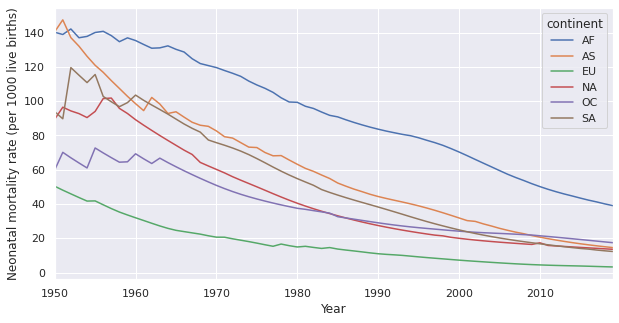

In [33]:
# continent_fplot = neonatalMortalityRate.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
ax = plot_df.plot()
ax.set_xlabel('Year')
ax.set_ylabel("Neonatal mortality rate (per 1000 live births)")

# Under 5 mortality rate

In [34]:
under5MortalityRate = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/under5MortalityRate.csv', parse_dates=['Period']) 
under5MortalityRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       29999 non-null  object        
 1   Period         29999 non-null  datetime64[ns]
 2   Indicator      29999 non-null  object        
 3   Dim1           29999 non-null  object        
 4   First Tooltip  29999 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


In [35]:
# Need to change some country name to use pycountry
under5MortalityRate.loc[under5MortalityRate['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
under5MortalityRate.loc[under5MortalityRate['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
under5MortalityRate.loc[under5MortalityRate['Location'] == "India (until 1975)", 'Location'] = 'India'
under5MortalityRate.loc[under5MortalityRate['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
under5MortalityRate.loc[under5MortalityRate['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
under5MortalityRate.loc[under5MortalityRate['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

under5MortalityRate['country_code'] = under5MortalityRate['Location'].apply(pc.country_name_to_country_alpha2)
under5MortalityRate['continent'] = under5MortalityRate['country_code'].apply(lambda x: convert_continent(x))

In [36]:
under5MortalityRate = under5MortalityRate.rename(columns={'Dim1':'Sex', 'First Tooltip':'mortality_rate'})
under5MortalityRate.head()

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
0,Afghanistan,2019-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,60.27 [47.44-74.62],AF,AS
1,Afghanistan,2019-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Male,63.83 [50.04-79.16],AF,AS
2,Afghanistan,2019-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,56.57 [44.54-70.18],AF,AS
3,Afghanistan,2018-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,62.54 [50.64-75.41],AF,AS
4,Afghanistan,2018-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Male,66.08 [53.41-79.76],AF,AS


In [37]:
f = lambda x: x['mortality_rate'].split("[")[0]
under5MortalityRate['mortality_rate'] = under5MortalityRate.apply(f, axis=1)
under5MortalityRate['mortality_rate'] = under5MortalityRate['mortality_rate'].astype(float)

In [38]:
under5MortalityRate.sample(10)

,Location,Period,Indicator,Sex,mortality_rate,country_code,continent
16938,Lesotho,1968-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,185.00,LS,AF
23285,Paraguay,1993-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,37.02,PY,SA
3828,Botswana,1963-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,153.10,BW,AF
16311,Kyrgyzstan,1985-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,79.64,KG,AS
25067,Russian Federation,2011-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,8.92,RU,EU
3912,Brazil,2000-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Both sexes,34.63,BR,SA
25292,Rwanda,1986-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,145.70,RW,AF
13622,India,1976-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,194.70,IN,AS
4655,Burkina Faso,1958-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,338.90,BF,AF
12083,Guatemala,1983-01-01,Under-five mortality rate (probability of dying by age 5 per 1000 live births),Female,102.10,GT,NA


In [39]:
under5MortalityRate_bothsex = under5MortalityRate[under5MortalityRate['Sex']=='Both sexes']
under5MortalityRate_male = under5MortalityRate[under5MortalityRate['Sex']=='Male']
under5MortalityRate_female = under5MortalityRate[under5MortalityRate['Sex']=='Female']

Text(0, 0.5, '(probability of dying by age 5 per 1000 live births')

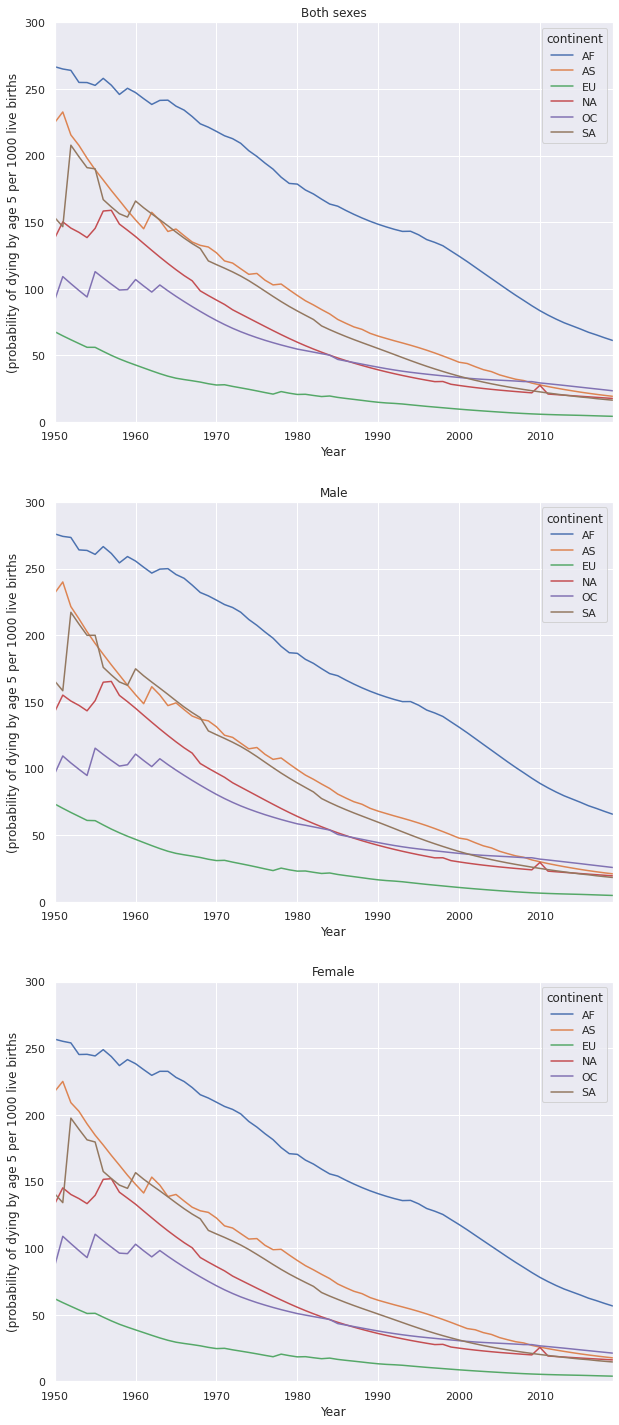

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=1)

continent_fplot = under5MortalityRate_bothsex.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[0], figsize = [10,25],ylim=(0,300), title='Both sexes')
axes[0].set_xlabel('Year')
axes[0].set_ylabel("(probability of dying by age 5 per 1000 live births")

continent_fplot = under5MortalityRate_male.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[1], figsize = [10,25],ylim=(0,300), title='Male')
axes[1].set_xlabel('Year')
axes[1].set_ylabel("(probability of dying by age 5 per 1000 live births")

continent_fplot = under5MortalityRate_female.groupby(['Period','continent']).mean()
plot_df = continent_fplot.unstack('continent').loc[:,'mortality_rate']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq="A")
plot_df.plot(ax=axes[2], figsize = [10,25],ylim=(0,300), title='Female')
axes[2].set_xlabel('Year')
axes[2].set_ylabel("(probability of dying by age 5 per 1000 live births")

# Medicinal condition

## Birth Attended By Skilled Personal

In [41]:
birthAttendedBySkilledPersonal = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/birthAttendedBySkilledPersonal.csv', parse_dates =['Period'])
birthAttendedBySkilledPersonal = birthAttendedBySkilledPersonal.rename(columns={'First Tooltip':'birth_attended_rate'})
birthAttendedBySkilledPersonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Location             1755 non-null   object        
 1   Period               1755 non-null   datetime64[ns]
 2   Indicator            1755 non-null   object        
 3   birth_attended_rate  1755 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 55.0+ KB


In [42]:
birthAttendedBySkilledPersonal.sample(10)

,Location,Period,Indicator,birth_attended_rate
1265,Paraguay,2015-01-01,Births attended by skilled health personnel (%),96.3
864,Ireland,2011-01-01,Births attended by skilled health personnel (%),99.8
79,Australia,2004-01-01,Births attended by skilled health personnel (%),99.3
1582,Tajikistan,2017-01-01,Births attended by skilled health personnel (%),94.8
625,Estonia,2001-01-01,Births attended by skilled health personnel (%),99.6
1045,Maldives,2010-01-01,Births attended by skilled health personnel (%),98.2
944,Kuwait,2016-01-01,Births attended by skilled health personnel (%),99.9
812,Hungary,2004-01-01,Births attended by skilled health personnel (%),99.6
486,Cuba,2002-01-01,Births attended by skilled health personnel (%),99.9
518,Czechia,2002-01-01,Births attended by skilled health personnel (%),99.8


In [43]:
birthAttendedBySkilledPersonal['Period'].value_counts().sort_index()

2000-01-01     76
2001-01-01     63
2002-01-01     75
2003-01-01     77
2004-01-01     78
2005-01-01     99
2006-01-01    118
2007-01-01    107
2008-01-01     99
2009-01-01    102
2010-01-01    113
2011-01-01    103
2012-01-01    104
2013-01-01     98
2014-01-01    112
2015-01-01     94
2016-01-01     90
2017-01-01     81
2018-01-01     60
2019-01-01      6
Name: Period, dtype: int64

In [44]:
# Need to change some country name to use pycountry
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "India (until 1975)", 'Location'] = 'India'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
birthAttendedBySkilledPersonal.loc[birthAttendedBySkilledPersonal['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(birthAttendedBySkilledPersonal['Location'].unique()))
NID = birthAttendedBySkilledPersonal['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
birthAttendedBySkilledPersonal = birthAttendedBySkilledPersonal.loc[NID]
print(len(birthAttendedBySkilledPersonal['Location'].unique()))

185
1683
175


In [45]:
merge_df = pd.merge(maternalMortalityRatio, birthAttendedBySkilledPersonal, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,ratio,country_code,continent,Indicator_y,birth_attended_rate
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,Births attended by skilled health personnel (%),53.4
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,NaN,NaN
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,Births attended by skilled health personnel (%),50.5
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,Births attended by skilled health personnel (%),45.2
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,NaN,NaN


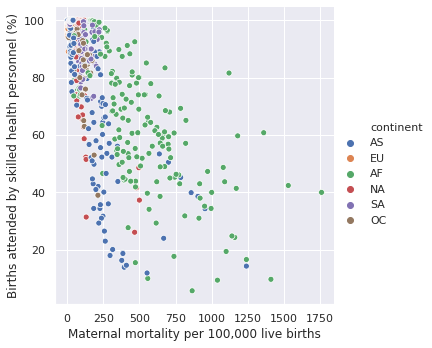

In [46]:
ax = sns.relplot(x='ratio', y='birth_attended_rate',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality per 100,000 live births', ylabel='Births attended by skilled health personnel (%)')
plt.show()

In [47]:
merge_df = pd.merge(infantMortalityRate, birthAttendedBySkilledPersonal, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex']=='Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,birth_attended_rate
0,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,46.51,AF,AS,NaN,NaN
3,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,48.04,AF,AS,Births attended by skilled health personnel (%),58.8
6,Afghanistan,2017-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,49.61,AF,AS,Births attended by skilled health personnel (%),53.4
9,Afghanistan,2016-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,51.32,AF,AS,NaN,NaN
12,Afghanistan,2015-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,53.17,AF,AS,Births attended by skilled health personnel (%),50.5


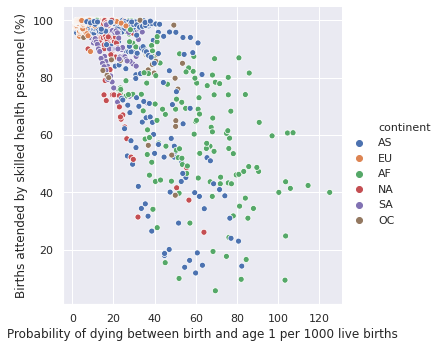

<Figure size 720x360 with 0 Axes>

In [48]:
ax = sns.relplot(x='mortality_rate', y='birth_attended_rate',data = merge_df, hue='continent')
ax.set(xlabel='Probability of dying between birth and age 1 per 1000 live births', ylabel='Births attended by skilled health personnel (%)')
plt.figure()
plt.show()

In [49]:
merge_df = pd.merge(neonatalMortalityRate, birthAttendedBySkilledPersonal, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,birth_attended_rate
0,Afghanistan,2019-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,35.86,AF,AS,NaN,NaN
1,Afghanistan,2018-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,36.89,AF,AS,Births attended by skilled health personnel (%),58.8
2,Afghanistan,2017-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.98,AF,AS,Births attended by skilled health personnel (%),53.4
3,Afghanistan,2016-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,39.05,AF,AS,NaN,NaN
4,Afghanistan,2015-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,40.27,AF,AS,Births attended by skilled health personnel (%),50.5


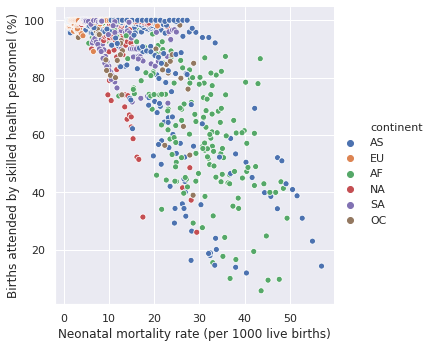

<Figure size 720x720 with 0 Axes>

In [50]:
ax = sns.relplot(x='mortality_rate', y='birth_attended_rate',data = merge_df, hue='continent')
ax.set(xlabel='Neonatal mortality rate (per 1000 live births)', ylabel='Births attended by skilled health personnel (%)')
plt.figure(figsize=[10,10])
plt.show()

## Medical Doctors

In [51]:
medicalDoctors = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv', parse_dates =['Period'])
medicalDoctors = medicalDoctors.rename(columns={'First Tooltip':'doctor_avail'})
medicalDoctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      2506 non-null   object        
 1   Period        2506 non-null   datetime64[ns]
 2   Indicator     2506 non-null   object        
 3   doctor_avail  2506 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 78.4+ KB


In [52]:
medicalDoctors['Period'].value_counts().sort_index()

1990-01-01     45
1991-01-01     45
1992-01-01     47
1993-01-01     48
1994-01-01     45
1995-01-01     52
1996-01-01     51
1997-01-01     58
1998-01-01     64
1999-01-01     61
2000-01-01     86
2001-01-01     82
2002-01-01     83
2003-01-01     84
2004-01-01    127
2005-01-01    101
2006-01-01     99
2007-01-01    109
2008-01-01    133
2009-01-01    132
2010-01-01    128
2011-01-01    114
2012-01-01    112
2013-01-01    109
2014-01-01    114
2015-01-01    105
2016-01-01    110
2017-01-01    101
2018-01-01     61
Name: Period, dtype: int64

In [53]:
# Need to change some country name to use pycountry
medicalDoctors.loc[medicalDoctors['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
medicalDoctors.loc[medicalDoctors['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
medicalDoctors.loc[medicalDoctors['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
medicalDoctors.loc[medicalDoctors['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
medicalDoctors.loc[medicalDoctors['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
medicalDoctors.loc[medicalDoctors['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
medicalDoctors.loc[medicalDoctors['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
medicalDoctors.loc[medicalDoctors['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
medicalDoctors.loc[medicalDoctors['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
medicalDoctors.loc[medicalDoctors['Location'] == "India (until 1975)", 'Location'] = 'India'
medicalDoctors.loc[medicalDoctors['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
medicalDoctors.loc[medicalDoctors['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
medicalDoctors.loc[medicalDoctors['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(medicalDoctors['Location'].unique()))
NID = medicalDoctors['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
medicalDoctors = medicalDoctors.loc[NID]
print(len(medicalDoctors['Location'].unique()))

193
2439
182


In [54]:
merge_df = pd.merge(maternalMortalityRatio, medicalDoctors, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,ratio,country_code,continent,Indicator_y,doctor_avail
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,NaN,NaN
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,"Medical doctors (per 10,000)",2.78
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,"Medical doctors (per 10,000)",2.85
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,"Medical doctors (per 10,000)",2.98
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,"Medical doctors (per 10,000)",2.85


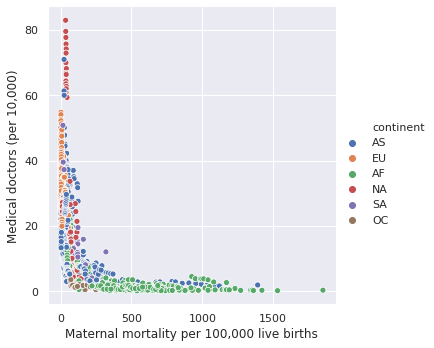

In [55]:
ax = sns.relplot(x='ratio', y='doctor_avail',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality per 100,000 live births', ylabel='Medical doctors (per 10,000)')
plt.show()

In [56]:
merge_df = pd.merge(infantMortalityRate, medicalDoctors, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex']=='Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,doctor_avail
0,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,46.51,AF,AS,NaN,NaN
3,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,48.04,AF,AS,NaN,NaN
6,Afghanistan,2017-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,49.61,AF,AS,NaN,NaN
9,Afghanistan,2016-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,51.32,AF,AS,"Medical doctors (per 10,000)",2.78
12,Afghanistan,2015-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,53.17,AF,AS,"Medical doctors (per 10,000)",2.85


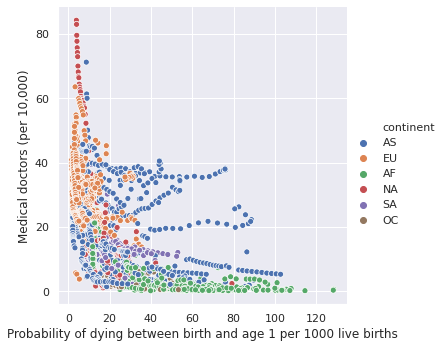

In [57]:
ax = sns.relplot(x='mortality_rate', y='doctor_avail',data = merge_df, hue='continent')
ax.set(xlabel='Probability of dying between birth and age 1 per 1000 live births', ylabel='Medical doctors (per 10,000)')
plt.show()

In [58]:
merge_df = pd.merge(neonatalMortalityRate, medicalDoctors, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex']=='Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,doctor_avail
0,Afghanistan,2019-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,35.86,AF,AS,NaN,NaN
1,Afghanistan,2018-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,36.89,AF,AS,NaN,NaN
2,Afghanistan,2017-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.98,AF,AS,NaN,NaN
3,Afghanistan,2016-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,39.05,AF,AS,"Medical doctors (per 10,000)",2.78
4,Afghanistan,2015-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,40.27,AF,AS,"Medical doctors (per 10,000)",2.85


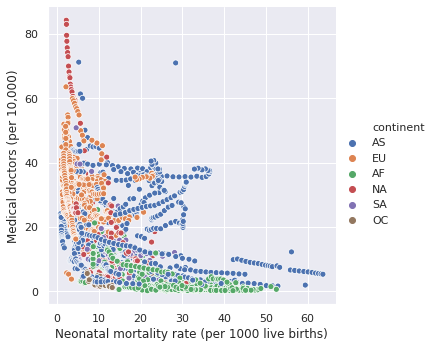

In [59]:
ax = sns.relplot(x='mortality_rate', y='doctor_avail',data = merge_df, hue='continent')
ax.set(xlabel='Neonatal mortality rate (per 1000 live births)', ylabel='Medical doctors (per 10,000)')
plt.show()

## Nursing and Midwife

In [60]:
nursingAndMidwife = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/nursingAndMidwife.csv', parse_dates =['Period'])
nursingAndMidwife = nursingAndMidwife.rename(columns={'First Tooltip':'midwife_avail'})
nursingAndMidwife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       2587 non-null   object        
 1   Period         2587 non-null   datetime64[ns]
 2   Indicator      2587 non-null   object        
 3   midwife_avail  2587 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 81.0+ KB


In [61]:
# Data from Belize has problem, should divide by 100
nursingAndMidwife.loc[(nursingAndMidwife['Location'] == 'Belize') & (nursingAndMidwife['midwife_avail'] > 50), 'midwife_avail']  /= 100

In [62]:
nursingAndMidwife['Period'].value_counts().sort_index()

1990-01-01     36
1991-01-01     34
1992-01-01     36
1993-01-01     36
1994-01-01     34
1995-01-01     44
1996-01-01     44
1997-01-01     51
1998-01-01     54
1999-01-01     61
2000-01-01     82
2001-01-01     78
2002-01-01     79
2003-01-01     84
2004-01-01    127
2005-01-01     99
2006-01-01    100
2007-01-01    104
2008-01-01    125
2009-01-01    129
2010-01-01    126
2011-01-01    110
2012-01-01    108
2013-01-01    157
2014-01-01    140
2015-01-01    133
2016-01-01    127
2017-01-01    131
2018-01-01    118
Name: Period, dtype: int64

In [63]:
# Need to change some country name to use pycountry
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "India (until 1975)", 'Location'] = 'India'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
nursingAndMidwife.loc[nursingAndMidwife['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(nursingAndMidwife['Location'].unique()))
NID = nursingAndMidwife['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
nursingAndMidwife = nursingAndMidwife.loc[NID]
print(len(nursingAndMidwife['Location'].unique()))

193
2505
182


In [64]:
merge_df = pd.merge(maternalMortalityRatio, nursingAndMidwife, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,ratio,country_code,continent,Indicator_y,midwife_avail
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.76
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.48
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.30
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.48
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,"Nursing and midwifery personnel (per 10,000)",2.50


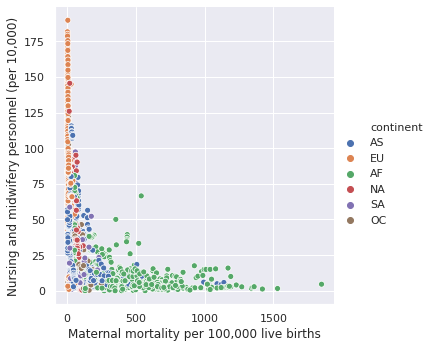

In [65]:
ax = sns.relplot(x='ratio', y='midwife_avail',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality per 100,000 live births', ylabel='Nursing and midwifery personnel (per 10,000)')
plt.show()

In [66]:
merge_df = pd.merge(infantMortalityRate, nursingAndMidwife, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex'] == 'Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,midwife_avail
0,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,46.51,AF,AS,NaN,NaN
3,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,48.04,AF,AS,NaN,NaN
6,Afghanistan,2017-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,49.61,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.76
9,Afghanistan,2016-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,51.32,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.48
12,Afghanistan,2015-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,53.17,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.30


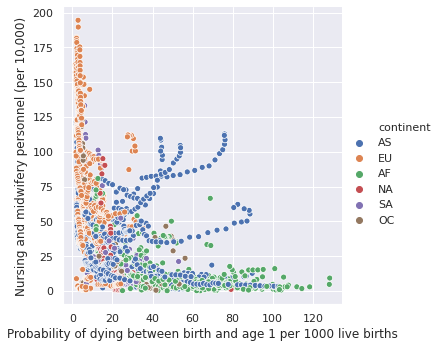

In [67]:
ax = sns.relplot(x='mortality_rate', y='midwife_avail',data = merge_df, hue='continent')
ax.set(xlabel='Probability of dying between birth and age 1 per 1000 live births', ylabel='Nursing and midwifery personnel (per 10,000)')
plt.show()

In [68]:
merge_df = pd.merge(neonatalMortalityRate, nursingAndMidwife, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,midwife_avail
0,Afghanistan,2019-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,35.86,AF,AS,NaN,NaN
1,Afghanistan,2018-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,36.89,AF,AS,NaN,NaN
2,Afghanistan,2017-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.98,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.76
3,Afghanistan,2016-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,39.05,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.48
4,Afghanistan,2015-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,40.27,AF,AS,"Nursing and midwifery personnel (per 10,000)",1.30


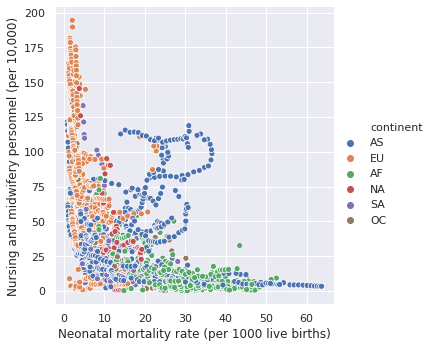

In [69]:
ax = sns.relplot(x='mortality_rate', y='midwife_avail',data = merge_df, hue='continent')
ax.set(xlabel='Neonatal mortality rate (per 1000 live births)', ylabel='Nursing and midwifery personnel (per 10,000)')
plt.show()

## Pharmacists

In [70]:
pharmacists = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/pharmacists.csv', parse_dates =['Period'])
pharmacists = pharmacists.rename(columns={'First Tooltip':'pharmacist_avail'})
pharmacists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          1795 non-null   object        
 1   Period            1795 non-null   datetime64[ns]
 2   Indicator         1795 non-null   object        
 3   pharmacist_avail  1795 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 56.2+ KB


In [71]:
pharmacists['Period'].value_counts().sort_index()

1990-01-01     25
1991-01-01     26
1992-01-01     28
1993-01-01     27
1994-01-01     25
1995-01-01     31
1996-01-01     33
1997-01-01     36
1998-01-01     39
1999-01-01     44
2000-01-01     57
2001-01-01     61
2002-01-01     60
2003-01-01     58
2004-01-01    103
2005-01-01     72
2006-01-01     72
2007-01-01     84
2008-01-01     95
2009-01-01    100
2010-01-01     95
2011-01-01     90
2012-01-01     89
2013-01-01     77
2014-01-01     84
2015-01-01     81
2016-01-01     79
2017-01-01     73
2018-01-01     51
Name: Period, dtype: int64

In [72]:
# Need to change some country name to use pycountry
pharmacists.loc[pharmacists['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
pharmacists.loc[pharmacists['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
pharmacists.loc[pharmacists['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
pharmacists.loc[pharmacists['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
pharmacists.loc[pharmacists['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
pharmacists.loc[pharmacists['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
pharmacists.loc[pharmacists['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
pharmacists.loc[pharmacists['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
pharmacists.loc[pharmacists['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
pharmacists.loc[pharmacists['Location'] == "India (until 1975)", 'Location'] = 'India'
pharmacists.loc[pharmacists['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
pharmacists.loc[pharmacists['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
pharmacists.loc[pharmacists['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(pharmacists['Location'].unique()))
NID = pharmacists['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
pharmacists = pharmacists.loc[NID]
print(len(pharmacists['Location'].unique()))

184
1753
175


In [73]:
merge_df = pd.merge(maternalMortalityRatio, pharmacists, how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,ratio,country_code,continent,Indicator_y,pharmacist_avail
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,NaN,NaN
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,"Pharmacists (per 10,000)",0.47
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,"Pharmacists (per 10,000)",0.50
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,"Pharmacists (per 10,000)",0.51
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,NaN,NaN


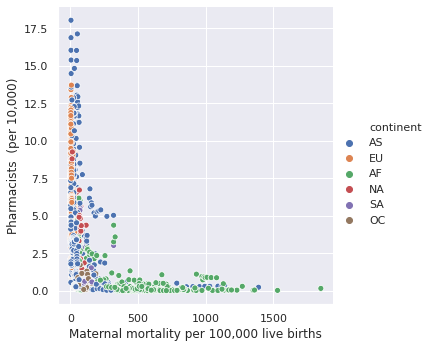

In [74]:
ax = sns.relplot(x='ratio', y='pharmacist_avail',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality per 100,000 live births', ylabel='Pharmacists  (per 10,000)')
plt.show()

In [75]:
merge_df = pd.merge(infantMortalityRate, pharmacists, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex']=='Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,pharmacist_avail
0,Afghanistan,2019-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,46.51,AF,AS,NaN,NaN
3,Afghanistan,2018-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,48.04,AF,AS,NaN,NaN
6,Afghanistan,2017-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,49.61,AF,AS,NaN,NaN
9,Afghanistan,2016-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,51.32,AF,AS,"Pharmacists (per 10,000)",0.47
12,Afghanistan,2015-01-01,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Both sexes,53.17,AF,AS,"Pharmacists (per 10,000)",0.50


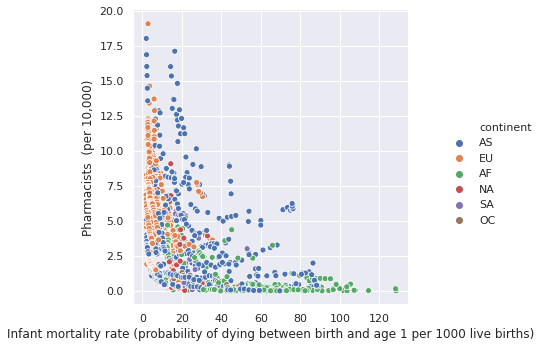

In [76]:
ax = sns.relplot(x='mortality_rate', y='pharmacist_avail',data = merge_df, hue='continent')
ax.set(xlabel='Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)', ylabel='Pharmacists  (per 10,000)')
plt.show()

In [77]:
merge_df = pd.merge(neonatalMortalityRate, pharmacists, how='left', on=['Period','Location'])
merge_df = merge_df[merge_df['Sex']=='Both sexes']
merge_df.head()

,Location,Period,Indicator_x,Sex,mortality_rate,country_code,continent,Indicator_y,pharmacist_avail
0,Afghanistan,2019-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,35.86,AF,AS,NaN,NaN
1,Afghanistan,2018-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,36.89,AF,AS,NaN,NaN
2,Afghanistan,2017-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,37.98,AF,AS,NaN,NaN
3,Afghanistan,2016-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,39.05,AF,AS,"Pharmacists (per 10,000)",0.47
4,Afghanistan,2015-01-01,Neonatal mortality rate (per 1000 live births),Both sexes,40.27,AF,AS,"Pharmacists (per 10,000)",0.50


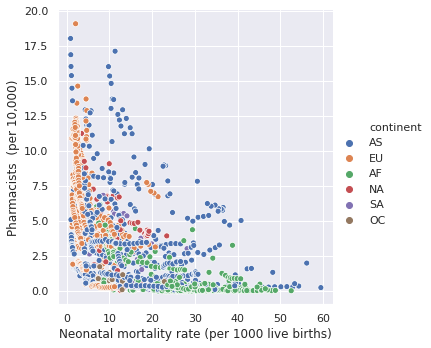

In [78]:
ax = sns.relplot(x='mortality_rate', y='pharmacist_avail',data = merge_df, hue='continent')
ax.set(xlabel='Neonatal mortality rate (per 1000 live births)', ylabel='Pharmacists  (per 10,000)')
plt.show()

# Hygiene: water and energy

In [79]:
basicDrinkingWaterServices = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/basicDrinkingWaterServices.csv', parse_dates=['Period'])
basicDrinkingWaterServices = basicDrinkingWaterServices[['Location','Period','First Tooltip']]
basicDrinkingWaterServices = basicDrinkingWaterServices.rename(columns={'First Tooltip':'basicDrinkingWaterServices'})
basicDrinkingWaterServices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Location                    3455 non-null   object        
 1   Period                      3455 non-null   datetime64[ns]
 2   basicDrinkingWaterServices  3455 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [80]:
atLeastBasicSanitizationServices = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/atLeastBasicSanitizationServices.csv', parse_dates=['Period'])
atLeastBasicSanitizationServices = atLeastBasicSanitizationServices[atLeastBasicSanitizationServices['Dim1'] == 'Total']
atLeastBasicSanitizationServices = atLeastBasicSanitizationServices[['Location','Period','First Tooltip']]
atLeastBasicSanitizationServices = atLeastBasicSanitizationServices.rename(columns={'First Tooltip':'atLeastBasicSanitizationServices'})
atLeastBasicSanitizationServices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 9365
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Location                          3439 non-null   object        
 1   Period                            3439 non-null   datetime64[ns]
 2   atLeastBasicSanitizationServices  3439 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 107.5+ KB


In [81]:
safelySanitization = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/safelySanitization.csv', parse_dates=['Period'])
safelySanitization = safelySanitization[safelySanitization['Dim1'] == 'Total']
safelySanitization = safelySanitization[['Location','Period','First Tooltip']]
safelySanitization = safelySanitization.rename(columns={'First Tooltip':'safelySanitization'})
safelySanitization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 3618
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Location            1571 non-null   object        
 1   Period              1571 non-null   datetime64[ns]
 2   safelySanitization  1571 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 49.1+ KB


In [82]:
basicHandWashing = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/basicHandWashing.csv', parse_dates=['Period'])
basicHandWashing = basicHandWashing[basicHandWashing['Dim1'] == 'Total']
basicHandWashing = basicHandWashing[['Location','Period','First Tooltip']]
basicHandWashing = basicHandWashing.rename(columns={'First Tooltip':'basicHandWashing'})
basicHandWashing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 2723
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          921 non-null    object        
 1   Period            921 non-null    datetime64[ns]
 2   basicHandWashing  921 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.8+ KB


In [83]:
# Merge all data related to hygiene
df_hygiene = pd.merge(basicDrinkingWaterServices, atLeastBasicSanitizationServices, how='left', on=['Period','Location'])
df_hygiene = pd.merge(df_hygiene, safelySanitization, how='left', on=['Period','Location'])
df_hygiene = pd.merge(df_hygiene, basicHandWashing, how='left', on=['Period','Location'])
df_hygiene.head(20)

,Location,Period,basicDrinkingWaterServices,atLeastBasicSanitizationServices,safelySanitization,basicHandWashing
0,Afghanistan,2017-01-01,57.32,43.42,NaN,37.75
1,Afghanistan,2016-01-01,54.84,42.05,NaN,37.67
2,Afghanistan,2015-01-01,52.39,40.71,NaN,37.59
3,Afghanistan,2014-01-01,49.96,39.37,NaN,37.52
4,Afghanistan,2013-01-01,47.56,38.06,NaN,37.44
5,Afghanistan,2012-01-01,45.19,36.75,NaN,37.37
6,Afghanistan,2011-01-01,42.84,35.46,NaN,37.30
7,Afghanistan,2010-01-01,40.52,34.18,NaN,37.22
8,Afghanistan,2009-01-01,38.23,32.91,NaN,37.15
9,Afghanistan,2008-01-01,35.97,31.65,NaN,37.08


In [84]:
df_hygiene.describe()

,basicDrinkingWaterServices,atLeastBasicSanitizationServices,safelySanitization,basicHandWashing
count,3455.000000,3431.000000,1564.000000,921.000000
mean,77.847103,71.164279,62.681081,47.501911
std,23.987570,30.360721,30.126874,32.774406
min,10.130000,3.400000,3.160000,1.030000
25%,59.895000,45.830000,35.610000,13.980000
50%,87.650000,85.170000,71.675000,44.520000
75%,98.460000,97.630000,91.097500,81.740000
max,100.000000,100.000000,100.000000,100.000000


# Finance-universal health coverage (UHC)

## UHC service coverage index 
Coverage of essential health services (defined as the average coverage of essential services based on tracer interventions that include reproductive, maternal, newborn and child health, infectious diseases, non-communicable diseases and service capacity and access, among the general and the most disadvantaged population). The indicator is an index reported on a unitless scale of 0 to 100, which is computed as the geometric mean of 14 tracer indicators of health service coverage. The tracer indicators are as follows, organized by four components of service coverage: 1. Reproductive, maternal, newborn and child health 2. Infectious diseases 3. Noncommunicable diseases 4. Service capacity and access See the 2019 monitoring report for the tracer indicator within each component. 

In [85]:
uhcCoverage = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/uhcCoverage.csv', parse_dates=['Period'])
uhcCoverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       366 non-null    object        
 1   Indicator      366 non-null    object        
 2   Period         366 non-null    datetime64[ns]
 3   First Tooltip  366 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.6+ KB


In [86]:
uhcCoverage['Period'].value_counts().sort_index()

2015-01-01    183
2017-01-01    183
Name: Period, dtype: int64

In [87]:
# Need to change some country name to use pycountry
uhcCoverage.loc[uhcCoverage['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
uhcCoverage.loc[uhcCoverage['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
uhcCoverage.loc[uhcCoverage['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
uhcCoverage.loc[uhcCoverage['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
uhcCoverage.loc[uhcCoverage['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
uhcCoverage.loc[uhcCoverage['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
uhcCoverage.loc[uhcCoverage['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
uhcCoverage.loc[uhcCoverage['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
uhcCoverage.loc[uhcCoverage['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
uhcCoverage.loc[uhcCoverage['Location'] == "India (until 1975)", 'Location'] = 'India'
uhcCoverage.loc[uhcCoverage['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
uhcCoverage.loc[uhcCoverage['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
uhcCoverage.loc[uhcCoverage['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(uhcCoverage['Location'].unique()))
NID = uhcCoverage['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
uhcCoverage = uhcCoverage.loc[NID]
print(len(uhcCoverage['Location'].unique()))

183
366
183


In [88]:
uhcCoverage['country_code'] = uhcCoverage['Location'].apply(pc.country_name_to_country_alpha2)
uhcCoverage['continent'] = uhcCoverage['country_code'].apply(lambda x: convert_continent(x))

In [89]:
merge_df = pd.merge(maternalMortalityRatio, uhcCoverage[['Period','Location','Indicator','First Tooltip']], how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator_x,ratio,country_code,continent,Indicator_y,First Tooltip
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,UHC index of essential service coverage,37.0
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,NaN,NaN
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,UHC index of essential service coverage,34.0
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,NaN,NaN
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,NaN,NaN


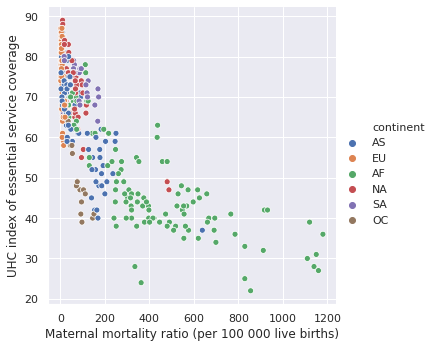

In [90]:
ax = sns.relplot(x='ratio', y='First Tooltip',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality ratio (per 100 000 live births)', ylabel='UHC index of essential service coverage')
plt.show()

## Monitoring Sustainable Development Goals–Indicator 3.8.2
https://www.who.int/health_financing/topics/financial-protection/monitoring-sdg/en/
![](https://www.who.int/health_financing/topics/financial-protection/sdg-target-figure-491.jpg)

In [91]:
population10SDG = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/population10SDG3.8.2.csv', parse_dates=['Period']) 
population10SDG = population10SDG[population10SDG['Dim1'] == 'Total']
population10SDG = population10SDG.rename(columns = {'First Tooltip':'population10SDG'})
population10SDG.head()

,Location,Period,Indicator,Dim1,population10SDG
0,Afghanistan,2013-01-01,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Total,14.63
3,Afghanistan,2007-01-01,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Total,4.84
6,Albania,2012-01-01,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Total,16.72
9,Albania,2008-01-01,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Total,13.91
12,Albania,2005-01-01,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Total,19.51


In [92]:
population25SDG = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/population25SDG3.8.2.csv', parse_dates=['Period']) 
population25SDG = population25SDG[population25SDG['Dim1'] == 'Total']
population25SDG = population25SDG.rename(columns = {'First Tooltip':'population25SDG'})
population25SDG.head()

,Location,Period,Indicator,Dim1,population25SDG
0,Afghanistan,2013-01-01,Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),Total,2.01
3,Afghanistan,2007-01-01,Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),Total,0.07
6,Albania,2012-01-01,Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),Total,4.95
9,Albania,2008-01-01,Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),Total,4.08
12,Albania,2005-01-01,Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),Total,4.50


In [93]:
populationSDG = pd.merge(population10SDG, population25SDG, on=['Location','Period'] )
populationSDG = populationSDG[['Location','Period','population10SDG','population25SDG']]
populationSDG.describe()

,population10SDG,population25SDG
count,711.000000,711.000000
mean,8.305218,1.660014
std,6.100460,1.846126
min,0.000000,0.000000
25%,3.465000,0.435000
50%,6.970000,1.080000
75%,11.985000,2.425000
max,54.200000,22.160000


In [94]:
populationSDG['Period'].value_counts().sort_index()

1985-01-01     2
1986-01-01     2
1987-01-01     1
1988-01-01     1
1990-01-01     2
1991-01-01     3
1992-01-01     3
1993-01-01     6
1994-01-01     5
1995-01-01    12
1996-01-01    14
1997-01-01    18
1998-01-01    26
1999-01-01    22
2000-01-01    30
2001-01-01    27
2002-01-01    37
2003-01-01    35
2004-01-01    39
2005-01-01    38
2006-01-01    32
2007-01-01    44
2008-01-01    35
2009-01-01    37
2010-01-01    55
2011-01-01    35
2012-01-01    39
2013-01-01    30
2014-01-01    31
2015-01-01    23
2016-01-01    22
2017-01-01     3
2018-01-01     2
Name: Period, dtype: int64

In [95]:
# Need to change some country name to use pycountry
populationSDG.loc[populationSDG['Location'] == "Sudan (until 2011)", 'Location'] = 'Sudan'
populationSDG.loc[populationSDG['Location'] == "Bolivia (Plurinational State of)", 'Location'] = 'Bolivia, Plurinational State of'
populationSDG.loc[populationSDG['Location'] == "Côte d’Ivoire", 'Location'] = 'Ivory Coast'
populationSDG.loc[populationSDG['Location'] == "Iran (Islamic Republic of)", 'Location'] = 'Iran, Islamic Republic of'
populationSDG.loc[populationSDG['Location'] == "Micronesia (Federated States of)", 'Location'] = 'Micronesia'
populationSDG.loc[populationSDG['Location'] == "Republic of Korea", 'Location'] = 'Korea, Republic of'
populationSDG.loc[populationSDG['Location'] == "The former Yugoslav Republic of Macedonia", 'Location'] = 'North Macedonia'
populationSDG.loc[populationSDG['Location'] == "Venezuela (Bolivarian Republic of)", 'Location'] = 'Venezuela, Bolivarian Republic of'
populationSDG.loc[populationSDG['Location'] == "Germany, Federal Republic (former)", 'Location'] = 'Germany'
populationSDG.loc[populationSDG['Location'] == "India (until 1975)", 'Location'] = 'India'
populationSDG.loc[populationSDG['Location'] == "Kiribati (until 1984)", 'Location'] = 'Kiribati'
populationSDG.loc[populationSDG['Location'] == "South Viet Nam (former)", 'Location'] = 'Viet Nam'
populationSDG.loc[populationSDG['Location'] == 'Yemen Arab Republic (until 1990)', 'Location'] = 'Yemen'

print(len(populationSDG['Location'].unique()))
NID = populationSDG['Location'].isin(maternalMortalityRatio['Location'])
print(sum(NID))
populationSDG = populationSDG.loc[NID]
print(len(populationSDG['Location'].unique()))

153
711
153


In [96]:
populationSDG['country_code'] = populationSDG['Location'].apply(pc.country_name_to_country_alpha2)
populationSDG['continent'] = populationSDG['country_code'].apply(lambda x: convert_continent(x))

In [97]:
merge_df = pd.merge(maternalMortalityRatio, populationSDG[['Period','Location','population10SDG','population25SDG']], how='left', on=['Period','Location'])
merge_df.head()

,Location,Period,Indicator,ratio,country_code,continent,population10SDG,population25SDG
0,Afghanistan,2017-01-01,Maternal mortality ratio (per 100 000 live births),638,AF,AS,NaN,NaN
1,Afghanistan,2016-01-01,Maternal mortality ratio (per 100 000 live births),673,AF,AS,NaN,NaN
2,Afghanistan,2015-01-01,Maternal mortality ratio (per 100 000 live births),701,AF,AS,NaN,NaN
3,Afghanistan,2014-01-01,Maternal mortality ratio (per 100 000 live births),786,AF,AS,NaN,NaN
4,Afghanistan,2013-01-01,Maternal mortality ratio (per 100 000 live births),810,AF,AS,14.63,2.01


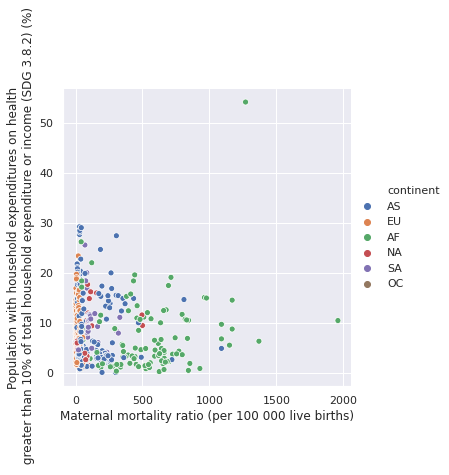

In [98]:
ax = sns.relplot(x='ratio', y='population10SDG',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality ratio (per 100 000 live births)', ylabel='Population with household expenditures on health\n greater than 10% of total household expenditure or income (SDG 3.8.2) (%)')
plt.show()

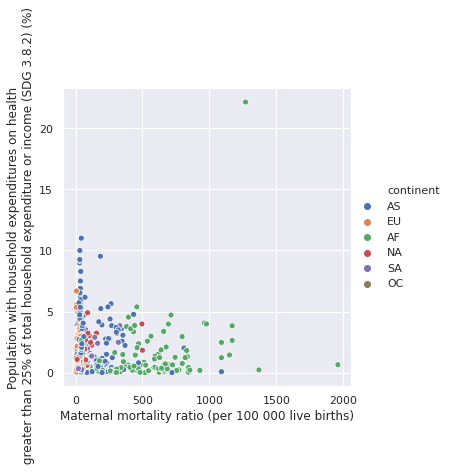

In [99]:
ax = sns.relplot(x='ratio', y='population25SDG',data = merge_df, hue='continent')
ax.set(xlabel='Maternal mortality ratio (per 100 000 live births)', ylabel='Population with household expenditures on health\n greater than 25% of total household expenditure or income (SDG 3.8.2) (%)')
plt.show()